TP Noté NLP - Classe 3D/3DG

Chloé PICHEREAU & Clémence ANDRE

Plusieurs étapes : 

• Collecte d’un dataset de données textuelles annotées (classes binaires ou multiclasses).

• Nettoyage des données en utilisant des outils tels que NLTK (stemming, suppression des stop words).

• Création des embeddings à l’aide de Word2Vec (modèle pré-entrainé  existant, comme vu dans le cours).

• Développement d’un réseau de neurones pour la prédiction (LSTM).

• Utiliser des visualisations pour toutes les étapes (Collecte, Nettoyage, embeddings et évaluation du score du modèle)


1. Chargement du fichier excel et défintion des colonnes et labels

In [2]:
pip install matplotlib seaborn pandas nltk gensim keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Chargement du dataset 
df = pd.read_csv('TestReviews.csv')
print(df.head())

                                              review  class
0  Fantastic spot for an even or a quite cocktail...      1
1  Love, love, love the calamari. It's so good an...      1
2  Love this place. Stiff martinis and cocktails,...      1
3  It's everything a great cocktail bar should be...      1
4  I came here before a pirates game, so it was a...      1


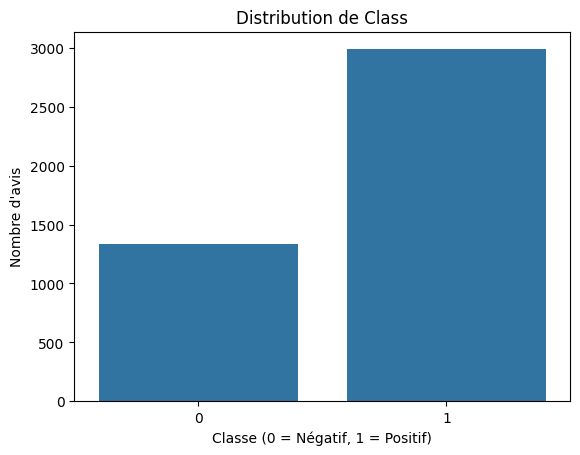

In [5]:
# Visualisation de la distribution de Class
sns.countplot(x='class', data=df)
plt.title('Distribution de Class')
plt.xlabel('Classe (0 = Négatif, 1 = Positif)')
plt.ylabel('Nombre d\'avis')
plt.show()

In [6]:
# Afficher les valeurs uniques de la colonne 'class'
print(df['class'].value_counts())

class
1    2989
0    1332
Name: count, dtype: int64


2. Nettoyage des données

In [7]:
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Nettoyage du texte
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Tokenization
    words = word_tokenize(text.lower())
    # Suppression des stop words et stemming
    cleaned_words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_words)

df['cleaned_text'] = df['review'].apply(clean_text)

In [9]:
# Comparaison entre les données réelles et les données nettoyées
print(df[['review', 'cleaned_text']].head())

                                              review  \
0  Fantastic spot for an even or a quite cocktail...   
1  Love, love, love the calamari. It's so good an...   
2  Love this place. Stiff martinis and cocktails,...   
3  It's everything a great cocktail bar should be...   
4  I came here before a pirates game, so it was a...   

                                        cleaned_text  
0  fantast spot even quit cocktail swell host yel...  
1  love love love calamari good spici endless lis...  
2  love place stiff martini cocktail cheap drink ...  
3  everyth great cocktail bar great locat ambianc...  
4  came pirat game around even gotten lucki tabl ...  


In [10]:
pip install wordcloud

  Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


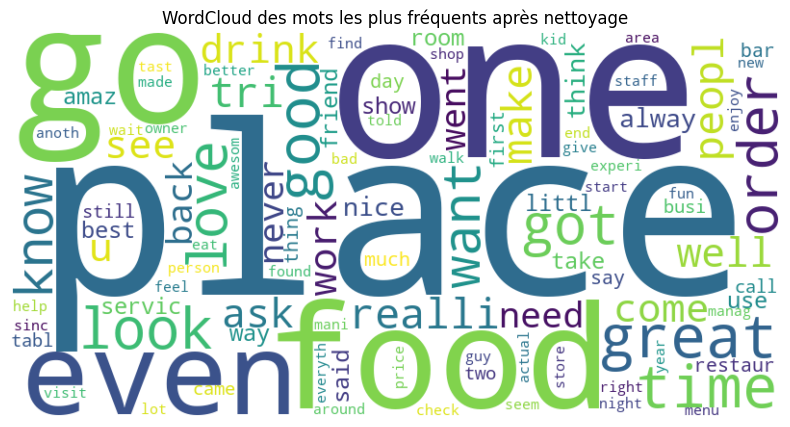

In [11]:
#Visualisation avec WordCloud des mots les plus fréquents

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenation de tous les textes nettoyés pour créer un seul texte
all_cleaned_text = " ".join(df['cleaned_text'])

# Génération du WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(all_cleaned_text)

# Affichage du WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud des mots les plus fréquents après nettoyage")
plt.show()

3. Création des embeddings avec Word2Vec

In [12]:
from gensim.models import Word2Vec

In [13]:
# Tokenisation des textes nettoyés pour Word2Vec
tokenized_reviews = [text.split() for text in df['cleaned_text']]

# Création du modèle Word2Vec
model_w2v = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

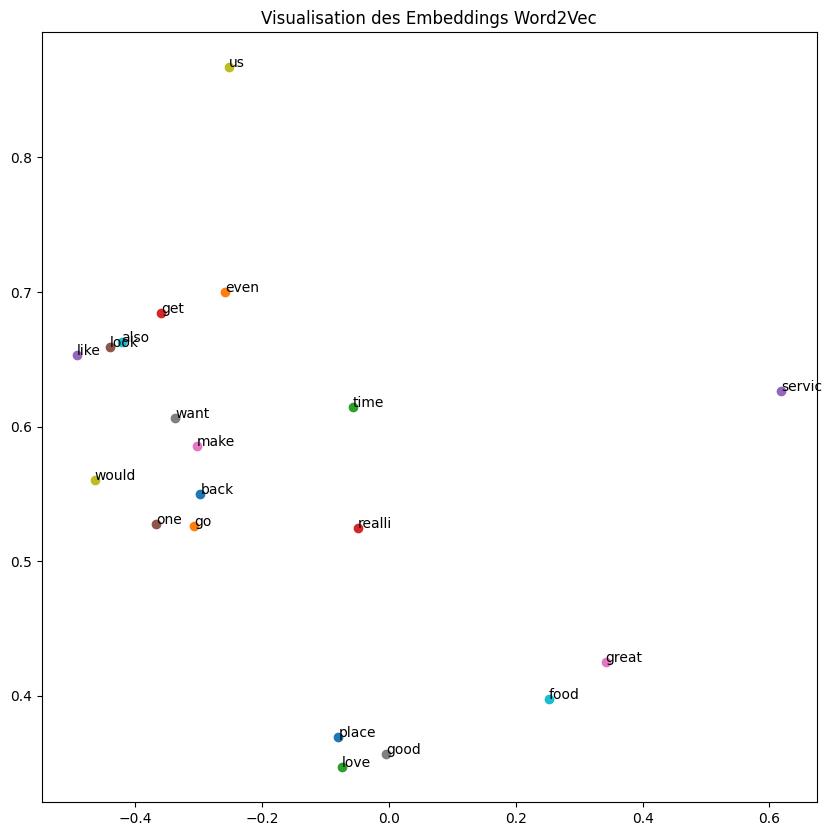

In [14]:
# Visualisation des Embeddings
words = list(model_w2v.wv.index_to_key)
plt.figure(figsize=(10, 10))
for word in words[:20]:
    plt.scatter(model_w2v.wv[word][0], model_w2v.wv[word][1])
    plt.text(model_w2v.wv[word][0], model_w2v.wv[word][1], word)
plt.title('Visualisation des Embeddings Word2Vec')
plt.show()

4. Développement d'un réseau de neurone LSTM

In [15]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
# Transformation en séquence numérique fixe
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=100)

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [19]:
# Création du modèle de réseau LSTM bidirectionnel
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\cleme\Desktop\Ingé 3\NLP - Text mining - Opinion mining\TP_note_NLP\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
# Entrainement du modèle
model.fit(
    padded_sequences, 
    df['class'], 
    epochs=5, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.8507 - loss: 0.4178 - val_accuracy: 0.6543 - val_loss: 0.7857
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.9767 - loss: 0.0802 - val_accuracy: 0.6312 - val_loss: 1.0768
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9933 - loss: 0.0257 - val_accuracy: 0.6913 - val_loss: 1.3829
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.9952 - loss: 0.0109 - val_accuracy: 0.6821 - val_loss: 1.1684
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.9937 - loss: 0.0237 - val_accuracy: 0.5803 - val_loss: 2.0267


5. Evaluation du modèle et visualisation

In [27]:
from sklearn.model_selection import train_test_split

# Séparation des données d'entraînement et de test (20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['class'], test_size=0.2, random_state=42)

# Evaluation du modèle sur le jeu de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss sur le test: {loss:.4f}, Accuracy sur le test: {accuracy:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9198 - loss: 0.7274
Loss sur le test: 0.6749, Accuracy sur le test: 0.9237


In [28]:
# Entraînement du modèle avec les données d'entraînement
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.9238 - loss: 0.2425 - val_accuracy: 0.9538 - val_loss: 0.1278
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.9866 - loss: 0.0471 - val_accuracy: 0.9538 - val_loss: 0.1401
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.9974 - loss: 0.0120 - val_accuracy: 0.9538 - val_loss: 0.1710
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9480 - val_loss: 0.1996
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.9987 - loss: 0.0022 - val_accuracy: 0.9491 - val_loss: 0.2383
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9491 - val_loss: 0.2526
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 1.0000 - loss: 9.8278e-04 - val_accuracy: 0.9526 - val_loss: 0.2593
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 1.0000 - los

In [ ]:
# Évaluation sur le jeu de test après entraînement
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss sur le test: {loss:.4f}, Accuracy sur le test: {accuracy:.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9545 - loss: 0.2500
Loss sur le test: 0.2806, Accuracy sur le test: 0.9491


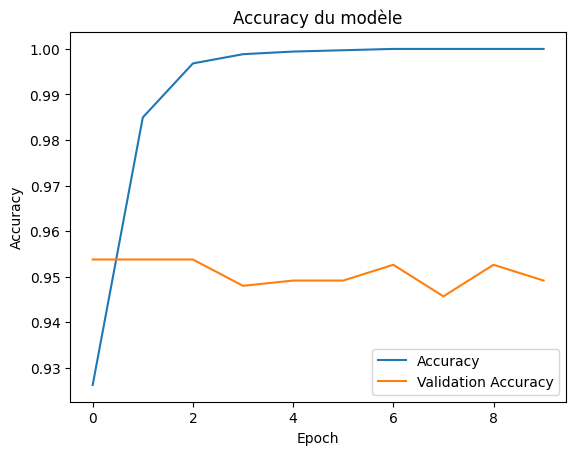

In [30]:
# Visualisation de l'accuracy selon l'Epoch
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy du modèle')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

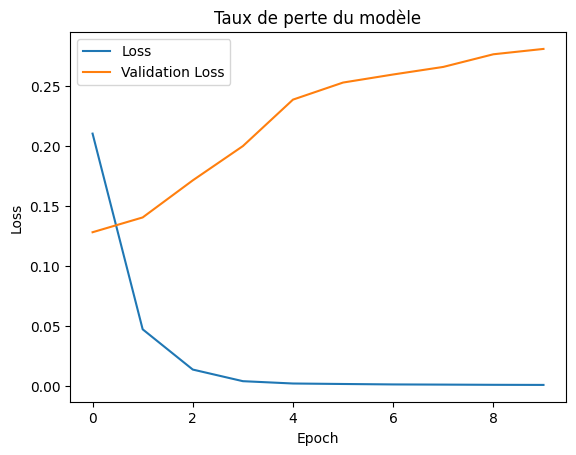

In [31]:
# Visualisation du taux de perte selon l'Epoch
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Taux de perte du modèle')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [43]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 43.6 kB/s eta 0:04:12
   ---------------------------------------- 0.0/11.0 MB 43.6 kB/s eta 0:04:12
   ---------------------------------------- 0.0/11.0 MB 43.6 kB/s eta 0:04:


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/s eta 0:02:23
   ------ --------------------------------- 1.8/11.0 MB 64.5 kB/

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


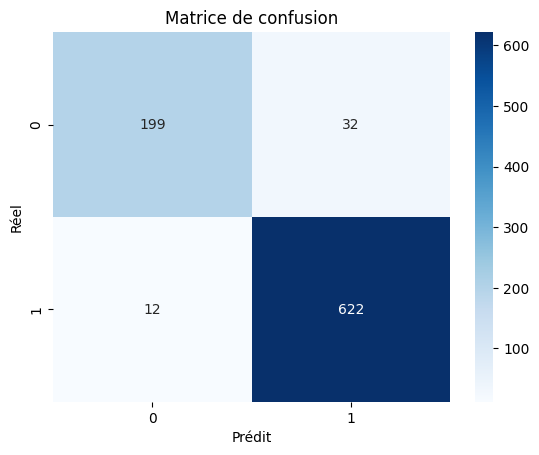

              precision    recall  f1-score   support

    Classe 0       0.94      0.86      0.90       231
    Classe 1       0.95      0.98      0.97       634

    accuracy                           0.95       865
   macro avg       0.95      0.92      0.93       865
weighted avg       0.95      0.95      0.95       865



In [32]:
# Prédiction sur le jeu de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Import des métriques
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=['Classe 0', 'Classe 1']))


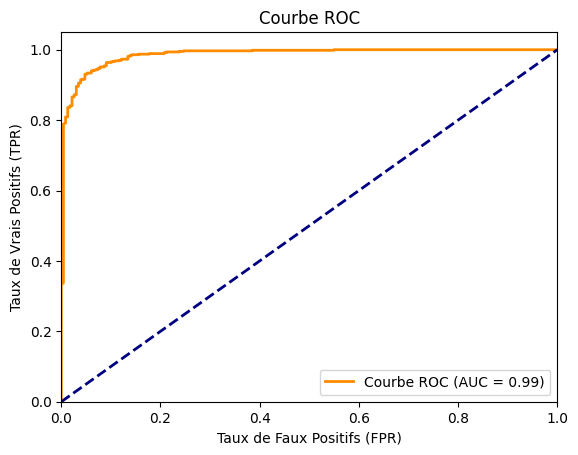

In [33]:
from sklearn.metrics import roc_curve, auc

# Calcul des valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()